# Linear Regression Models and Prediction making

## To find the relationship between the Pulse and the Total Calories burnt in a workout session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lmodel

In [3]:
data = pd.read_csv(r"GlobalCO2Emissions.csv")
data.dropna(inplace=True)

In [4]:
data

,Year,Emissions
0,1750,0.03
1,1760,0.03
2,1770,0.03
3,1780,0.03
4,1790,0.04
5,1800,0.04
6,1810,0.05
7,1820,0.06
8,1830,0.07
9,1840,0.09


In [28]:
lmodel?

In [20]:
data.describe()

,Year,Emissions
count,29.000000,29.000000
mean,1889.827586,5.937586
std,84.855368,11.443084
min,1750.000000,0.030000
25%,1820.000000,0.060000
50%,1890.000000,0.430000
75%,1960.000000,3.740000
max,2023.000000,40.900000


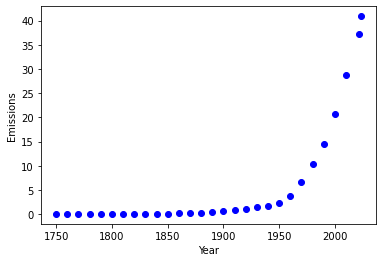

In [7]:
plt.scatter(data["Year"], data["Emissions"], color = "blue")
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.show()

### Test and Train Data

In [8]:
train = data[:(int(len(data)*0.8))]
test = data[(int(len(data)*0.8)):]

In [9]:
regr = lmodel.LinearRegression()
train_x = np.array(train[["Year"]])
train_y = np.array(train[["Emissions"]])

In [10]:
regr.fit(train_x, train_y)

LinearRegression()

###  Values to Plot graph with

In [11]:
"Coefficient/ Slope:", regr.coef_

('Coefficient/ Slope:', array([[0.01660968]]))

In [12]:
"Intercept:", regr.intercept_

('Intercept:', array([-30.02444664]))

### Plot graph with slope and intercept from above

Text(0, 0.5, 'Emissions')

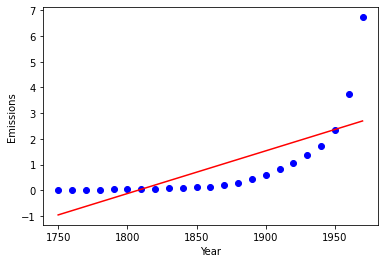

In [13]:
plt.scatter(train["Year"], train["Emissions"], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('Year')
plt.ylabel('Emissions')

### Make predictions with slope intercept and linear equation

In [14]:
def get_regression_predictions(input_features, intercept, slope):
    predicted_values = input_features*slope + intercept
    return predicted_values


In [21]:
my_year = 2023
estimated_emission=get_regression_predictions(my_year, regr.intercept_[0], regr.coef_[0][0])

In [22]:
"Estimated Emission:", estimated_emission

('Estimated Emission:', 3.5769436758893285)

### To check the accuracy of the model

In [31]:
from sklearn.metrics import r2_score

In [32]:
test_x = np.array(test[["Year"]])
test_y = np.array(test[["Emissions"]])
test_y1 = regr.predict(test_x)

In [33]:
"Mean absolute error: %.2f" %np.mean(np.absolute(test_y1-test_y))

'Mean absolute error: 22.10'

In [34]:
"Mean Sum of Squares: %.2f" %np.mean((test_y1-test_y)**2)

'Mean Sum of Squares: 608.73'

In [36]:
"R2 Score: %.2f" %r2_score(test_y1, test_y)

'R2 Score: -8773.32'

In [39]:
data2 = pd.read_csv(r"terrorist-attacks new.csv")
data2.dropna(inplace=True)

In [40]:
data2[:3]

,Entity,Code,Year,Terrorist attacks
0,Afghanistan,AFG,1970,0
1,Afghanistan,AFG,1971,0
2,Afghanistan,AFG,1972,0


In [70]:
data21 = data2.groupby("Entity")["Terrorist attacks"].sum()
data21.describe()
#data21[190:191]

count       196.000000
mean       2106.790816
std       14643.240507
min           1.000000
25%          17.000000
50%          80.000000
75%         561.000000
max      201272.000000
Name: Terrorist attacks, dtype: float64

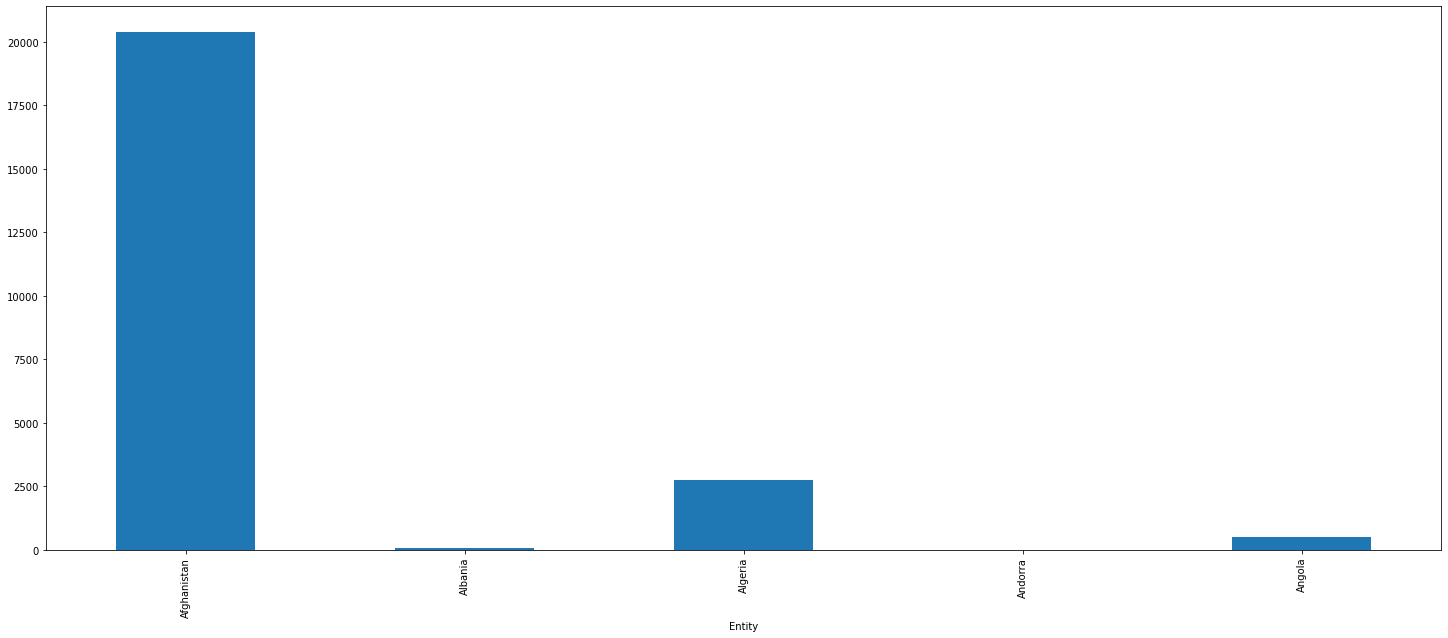

In [59]:
data21[:5].plot(kind="bar", figsize=(25,10))
plt.show()

In [72]:
data3 = pd.read_excel(r"Amazon 2_Raw.xlsx")
data3.head()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


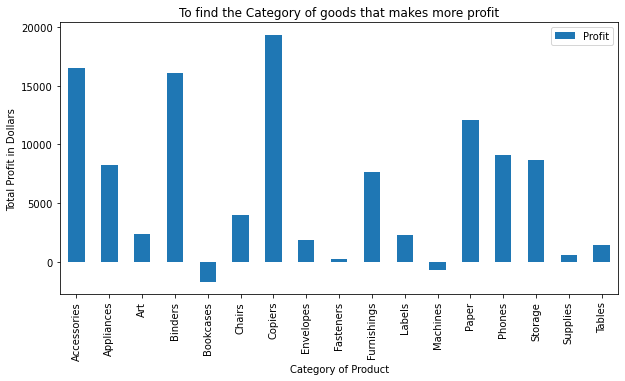

In [95]:
data31 = pd.DataFrame(data3.groupby("Category")["Profit"].sum())
data31.plot(kind="bar", figsize=(10,5))
plt.xlabel("Category of Product")
plt.ylabel("Total Profit in Dollars")
plt.title("To find the Category of goods that makes more profit")
plt.show()

In [96]:
data31[data31["Profit"] == float(data31.describe().min())]

,Profit
Category,
Bookcases,-1646.5117


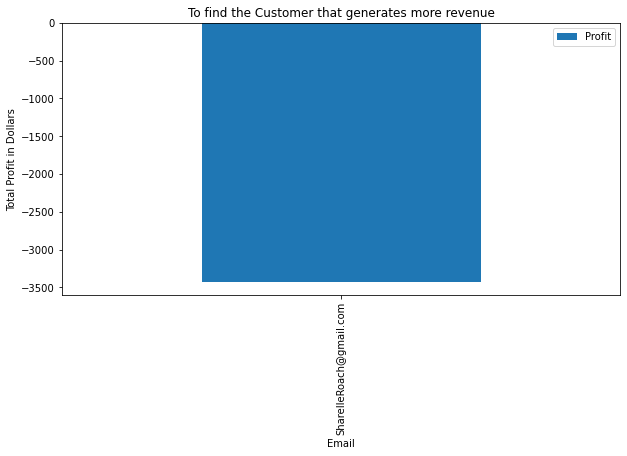

In [122]:
data32 = pd.DataFrame(data3.groupby("EmailID")["Profit"].sum())
data32[data32["Profit"] < -3400].plot(kind="bar", figsize=(10,5))
plt.xlabel("Email")
plt.ylabel("Total Profit in Dollars")
plt.title("To find the Customer that generates more revenue")
plt.show()

In [123]:
data3[data3["EmailID"] == 'SharelleRoach@gmail.com']

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
968,CA-2014-134845,2014-04-18,2014-04-24,SharelleRoach@gmail.com,"United States,Louisville,Colorado",Binders,Insertable Tab Post Binder Dividers,12.030,5,-9.2230
969,CA-2014-134845,2014-04-18,2014-04-24,SharelleRoach@gmail.com,"United States,Louisville,Colorado",Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,-3399.9800
970,CA-2014-134845,2014-04-18,2014-04-24,SharelleRoach@gmail.com,"United States,Louisville,Colorado",Binders,GBC VeloBinder Manual Binding System,21.594,2,-15.8356
971,CA-2014-134845,2014-04-18,2014-04-24,SharelleRoach@gmail.com,"United States,Louisville,Colorado",Binders,Cardinal Holdit Business Card Pockets,8.964,6,-6.5736
972,CA-2014-134845,2014-04-18,2014-04-24,SharelleRoach@gmail.com,"United States,Louisville,Colorado",Paper,Xerox 225,20.736,4,7.2576


In [126]:
data3[data3["Product Name"] == 'GBC VeloBinder Manual Binding System']

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
970,CA-2014-134845,2014-04-18,2014-04-24,SharelleRoach@gmail.com,"United States,Louisville,Colorado",Binders,GBC VeloBinder Manual Binding System,21.594,2,-15.8356
1433,CA-2014-138464,2014-07-09,2014-07-13,VickyFreymann@gmail.com,"United States,Seattle,Washington",Binders,GBC VeloBinder Manual Binding System,86.376,3,30.2316
2376,US-2014-128447,2014-11-11,2014-11-18,MichaelChen@gmail.com,"United States,Pasco,Washington",Binders,GBC VeloBinder Manual Binding System,28.792,1,10.0772
3052,CA-2014-156958,2014-12-06,2014-12-07,PatrickBzostek@gmail.com,"United States,Seattle,Washington",Binders,GBC VeloBinder Manual Binding System,172.752,6,60.4632
3121,CA-2013-116379,2013-11-08,2013-11-13,LisaDeCherney@gmail.com,"United States,San Francisco,California",Binders,GBC VeloBinder Manual Binding System,57.584,2,20.1544


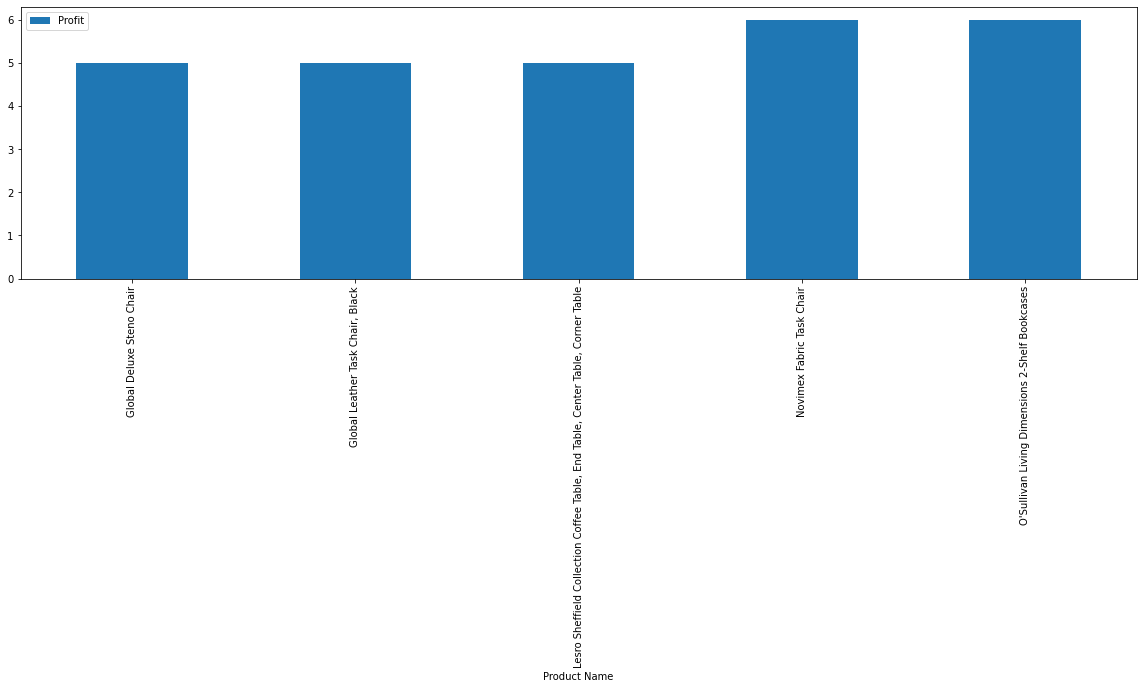

In [195]:
data33 = data3[data3["Profit"] < 0]
data331 = pd.DataFrame(data33.groupby("Product Name")["Profit"].count())
data331[data331["Profit"]>4].plot(kind = 'bar', figsize =(20,5))
plt.show()

In [173]:
x = list(data33["Product Name"])
data34truth = [data3["Product Name"][i] in x for i in range(len(list(data3["Product Name"])))]
data34truth

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 Fa

## I am trying to find out what's special about goods that have loss(-ve profit). Is loss related to the Product Name or the Customer?
### In order to do this, I have brought out  the subset that contains all the purchases of goods that has had a loss once. I'd have to check if a good always has loss irrespective of the customer or does a customer always incur loss on the business irrespective of the goods bought
### I'd also have to subset all the purchases made by customers who had once incurred a loss on the business

In [175]:
data34 = data3[data34truth]

In [183]:
data34[data34["Profit"]<0]

#data34.groupby("Product Name")["Profit"].sum().plot(kind="bar")
#plt.show()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
28,US-2014-109484,2014-11-07,2014-11-13,RogerBarcio@gmail.com,"United States,Portland,Oregon",Binders,Flexible Leather- Look Classic Collection Ring...,5.682,1,-3.7880
30,US-2012-156867,2012-11-13,2012-11-17,LenaCacioppo@gmail.com,"United States,Aurora,Colorado",Accessories,Logitech K350 2.4Ghz Wireless Keyboard,238.896,6,-26.8758
31,US-2012-156867,2012-11-13,2012-11-17,LenaCacioppo@gmail.com,"United States,Aurora,Colorado",Furnishings,"Deflect-o DuraMat Lighweight, Studded, Beveled...",102.360,3,-3.8385
32,US-2012-156867,2012-11-13,2012-11-17,LenaCacioppo@gmail.com,"United States,Aurora,Colorado",Binders,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",36.882,3,-25.8174
34,US-2014-107272,2014-11-06,2014-11-13,TroyStaebel@gmail.com,"United States,Phoenix,Arizona",Binders,"Avery Durable Slant Ring Binders, No Labels",2.388,2,-1.8308
...,...,...,...,...,...,...,...,...,...,...
3132,CA-2014-137505,2014-11-25,2014-11-25,BethPaige@gmail.com,"United States,Los Angeles,California",Tables,Hon 61000 Series Interactive Training Tables,71.088,2,-1.7772
3147,US-2011-164406,2011-08-15,2011-08-19,BrianDahlen@gmail.com,"United States,San Francisco,California",Chairs,Novimex Fabric Task Chair,195.136,4,-12.1960
3174,CA-2012-132388,2012-10-10,2012-10-12,KatherineNockton@gmail.com,"United States,Santa Barbara,California",Chairs,"Global Leather & Oak Executive Chair, Burgundy",362.136,3,-54.3204
3179,CA-2012-104948,2012-11-13,2012-11-17,KeithHerrera@gmail.com,"United States,San Bernardino,California",Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.332,4,-40.1960
